In [3]:
!pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   --------------------------- ------------ 8.9/12.9 MB 45.7 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 40.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage import io, color

In [5]:
# Parameters for LBP
radius = 3   # how far neighbors are (3 = circle of radius 3)
n_points = 8 * radius  # number of sample points
METHOD = 'uniform'  # 'uniform' gives smaller histogram size


In [8]:
image = io.imread("example.png")

# If image has 4 channels (RGBA), take only first 3 (RGB)
if image.shape[-1] == 4:
    image = image[:, :, :3]

gray = color.rgb2gray(image)

In [9]:
# Compute LBP
lbp = local_binary_pattern(gray, n_points, radius, METHOD)

C:\Users\TEJASWINI CHANDARGI\AppData\Roaming\Python\Python313\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


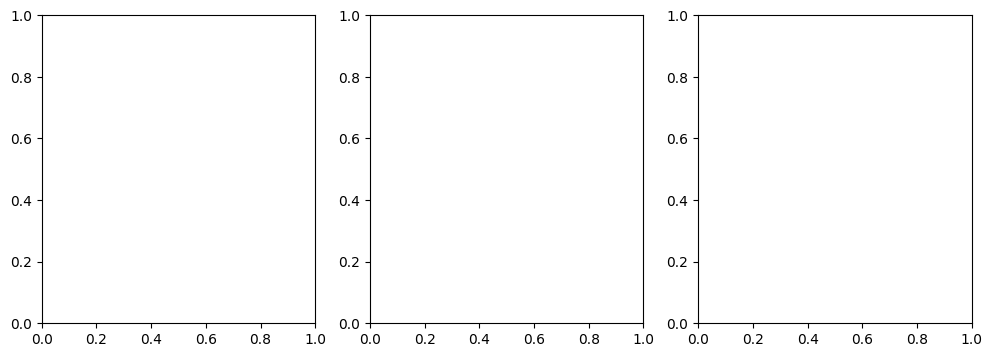

In [10]:
# Plot results
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

In [13]:
ax[0].imshow(image)
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow(gray, cmap="gray")
ax[1].set_title("Grayscale")
ax[1].axis("off")

ax[2].imshow(lbp, cmap="gray")
ax[2].set_title("LBP Image")
ax[2].axis("off")

plt.show()

In [14]:
# Histogram of LBP
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3),
                       range=(0, n_points + 2))

In [15]:
# Normalize histogram
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)

print("LBP feature vector (length={}):".format(len(hist)))
print(hist)

LBP feature vector (length=26):
[0.05538726 0.03650303 0.01827293 0.01094896 0.007982   0.00710592
 0.00611693 0.00694239 0.00792359 0.00906443 0.01202361 0.01795365
 0.02292196 0.02146183 0.01253757 0.01297756 0.00807934 0.01026368
 0.0068139  0.00765882 0.00947716 0.01329294 0.02314389 0.03508574
 0.06981326 0.55024764]
